<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20221004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* customer analysis
* iterator

In [2]:
import pandas as pd 
import numpy as np
import plotnine as gg
from plotnine import ggplot 
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime, date, time, timezone, timedelta
import os
import re 

from functools import reduce 
from collections import defaultdict 

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# customer analysis

In [3]:
os.listdir()

['.config',
 'scanner_data.csv',
 '1_customers_dataset.csv',
 'test.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 '1_orders_dataset.csv',
 'mall_customers.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 '1_order_payments_dataset.csv',
 'ecommerce-data.csv',
 'online_retail_II.xlsx',
 'sample_data']

In [4]:
df = pd.read_csv('mall_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.columns = [re.sub(' ', '_', re.sub(' \(.+\)$', '', a)).lower() for a in df.columns]
df.head()

,customerid,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


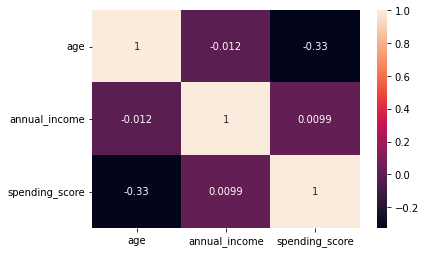

In [7]:
sns.heatmap(df.drop(['customerid'], axis = 1).corr(), annot = True)

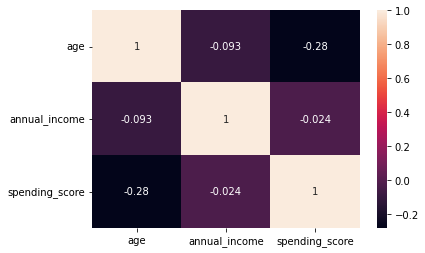

In [8]:
sns.heatmap(df[df.gender == 'Male'].drop(['customerid'], axis = 1).corr(), annot = True)

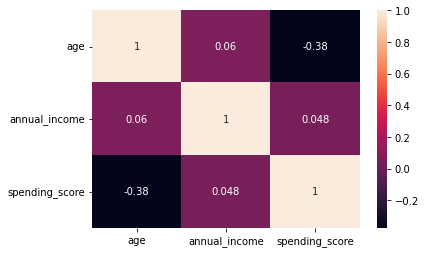

In [9]:
sns.heatmap(df[df.gender == 'Female'].drop(['customerid'], axis = 1).corr(), annot = True)

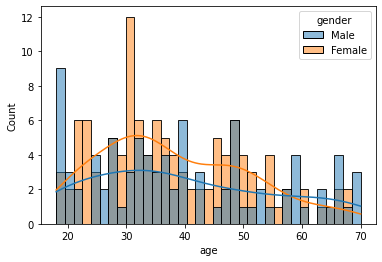

In [12]:
sns.histplot(data = df, x = 'age', hue = 'gender', bins = 35, kde = True)

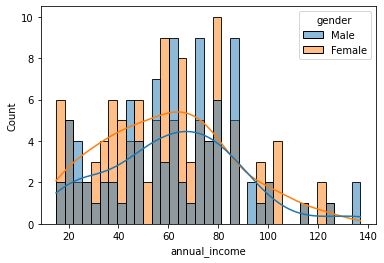

In [14]:
sns.histplot(data = df, x = 'annual_income', hue = 'gender', bins = 35, kde = True)

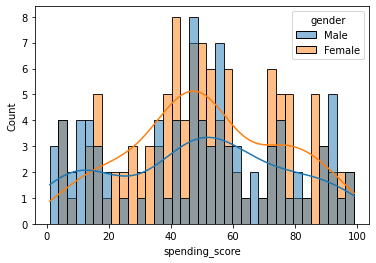

In [16]:
sns.histplot(data = df, x = 'spending_score', hue = 'gender', bins = 35, kde = True)

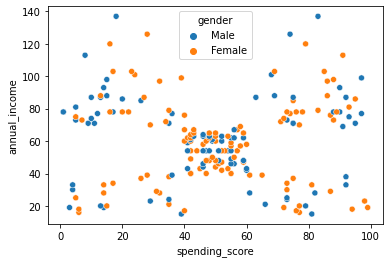

In [17]:
sns.scatterplot(data = df, x = 'spending_score', y = 'annual_income', hue = 'gender')

In [23]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df[['annual_income', 'spending_score']])
df_std

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [30]:
km = KMeans(n_clusters=5, random_state=10)
km.fit(df_std)
df = df.assign(km = [str(a) for a in km.fit_predict(df_std)])
df.head()

,customerid,gender,age,annual_income,spending_score,km
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3


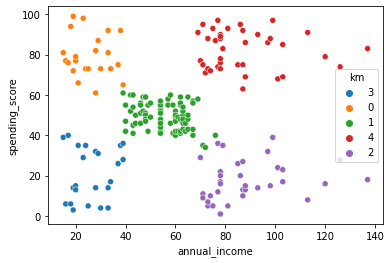

In [31]:
sns.scatterplot(data = df, x = 'annual_income', y = 'spending_score', hue = 'km')

In [33]:
df.groupby(['km'])['annual_income', 'spending_score'].agg(['mean', 'std']).reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


km annual_income            spending_score           
              mean        std           mean        std
0  0     25.727273   7.566731      79.363636  10.504174
1  1     55.296296   8.988109      49.518519   6.530909
2  2     88.200000  16.399067      17.114286   9.952154
3  3     26.304348   7.893811      20.913043  13.017167
4  4     86.538462  16.312485      82.128205   9.364489

In [49]:
cnt = df.groupby(['km'])['annual_income', 'spending_score'].sum().reset_index()
cnt = pd.melt(cnt, id_vars='km', var_name = 'type')
cnt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


,km,type,value
0,0,annual_income,566
1,1,annual_income,4479
2,2,annual_income,3087
3,3,annual_income,605
4,4,annual_income,3375
5,0,spending_score,1746
6,1,spending_score,4011
7,2,spending_score,599
8,3,spending_score,481
9,4,spending_score,3203


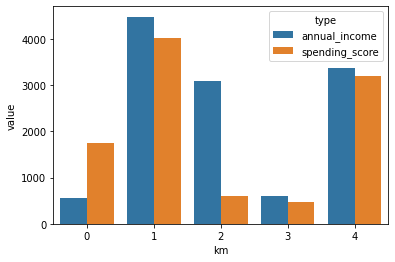

In [51]:
sns.barplot(data = cnt, x = 'km', y = 'value', hue = 'type')

# iterator

In [36]:
mat = [list('ABC'), list('DEF'), list('GHI')]
a = {letter : [r,c] for r, rows in enumerate(mat) for c, letter in enumerate(rows)}
arr = np.empty([3,3], dtype = 'object')
for k, v in a. items() :
  arr[v[0], v[1]] = k

arr

array([['A', 'B', 'C'],
       ['D', 'E', 'F'],
       ['G', 'H', 'I']], dtype=object)

In [42]:
names = np.random.choice(['kim', 'lee', 'park'], 100, replace = True)
score = [a if a <= 100 else 100 for a in np.random.normal(70,20, 100).round()]
rev = np.random.normal(2000, 500, 100)
b = pd.DataFrame({'name' : names, 'score' : score, 'rev' : rev})
b.head()

,name,score,rev
0,lee,57.0,1786.126363
1,lee,17.0,1727.043677
2,lee,61.0,2216.867210
3,kim,54.0,1422.393656
4,park,75.0,1952.411703


In [43]:
res_score = defaultdict(list)
res_rev = defaultdict(list)
for i in range(len(b)) :
  res_score[b['name'][i]].append(b['score'][i])
  res_rev[b['name'][i]].append(b['rev'][i])

print(res_score)
print(res_rev)

defaultdict(<class 'list'>, {'lee': [57.0, 17.0, 61.0, 66.0, 80.0, 35.0, 85.0, 76.0, 72.0, 59.0, 93.0, 93.0, 52.0, 63.0, 46.0, 26.0, 100.0, 63.0, 42.0, 33.0, 28.0, 42.0, 58.0, 55.0, 65.0, 78.0, 68.0, 71.0, 79.0, 42.0, 79.0, 57.0, 65.0, 64.0, 100.0, 22.0], 'kim': [54.0, 31.0, 84.0, 21.0, 100.0, 81.0, 33.0, 55.0, 42.0, 81.0, 55.0, 72.0, 63.0, 68.0, 56.0, 76.0, 54.0, 95.0, 74.0, 78.0, 67.0, 67.0, 76.0, 89.0, 88.0, 33.0, 87.0, 76.0, 59.0, 73.0, 69.0, 21.0], 'park': [75.0, 41.0, 68.0, 54.0, 33.0, 81.0, 66.0, 70.0, 68.0, 81.0, 71.0, 69.0, 79.0, 80.0, 48.0, 86.0, 64.0, 32.0, 20.0, 60.0, 95.0, 70.0, 44.0, 80.0, 97.0, 76.0, 63.0, 85.0, 92.0, 85.0, 52.0, 78.0]})
defaultdict(<class 'list'>, {'lee': [1786.1263628441066, 1727.0436770528838, 2216.867209597512, 1971.056094510296, 3066.1377716320408, 1792.7316755659174, 2576.675009590638, 2159.9599218506664, 2010.5275730118788, 2300.3850906200632, 2090.88753632671, 2025.7377466021417, 2655.8194826114122, 1935.9322708161856, 2120.8189278687555, 1688.72

In [45]:
[{k : np.mean(v).round(2)} for k, v in res_score.items()]

[{'lee': 60.89}, {'kim': 64.94}, {'park': 67.59}]

In [46]:
[{k : np.std(v).round(2)} for k, v in res_score.items()]

[{'lee': 21.24}, {'kim': 20.55}, {'park': 18.63}]

In [47]:
[{k : np.sum(v).round(0)} for k, v in res_rev.items()]

[{'lee': 74792.0}, {'kim': 64080.0}, {'park': 63171.0}]